<a href="https://colab.research.google.com/github/wozzin/AI_ML/blob/main/KNN_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 : wisconsin의 유방암 데이터셋
# 총 569건의 데이터로 악성(212), 양성 (357)으로 구성

<center>
 <img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99306C335A1685AA111704" alt="wisconsin의 유방암 데이터셋" width="30%" />

</center>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer


In [4]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)
print('==================')
print(cancer.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

In [5]:
import numpy as np
# 양성과 악성 데이터의 수
# zip() : 2개의 데이터를 연결
# bincount() : 클래스별 개수를 반환

for n,v in zip(cancer.target_names, np.bincount(cancer.target)):
  print({n:v})

{'malignant': 212}
{'benign': 357}


In [6]:
# 특성의 명칭
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [20]:
# 훈련 데이터와 테스트 데이터 분리
# stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. 
# stratify 값을 target으로 지정해주면 
# 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. 
# (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고
#  classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    random_state = 66) # 셔플이랑 차이점이 무엇인지, 어떤것을 사용해야하는지
                                                                      # test_size 지정 안해도 되는지

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [12]:
# 훈련과 테스트 데이터셋 분리 후 악성과 양성의 비율이 비슷한지 확인
t = np.bincount(cancer.target)
print(t[1] / t[0])
t = np.bincount(y_train)
print(t[1] / t[0])
t = np.bincount(y_test)
print(t[1] / t[0])

1.6839622641509433
1.679245283018868
1.6981132075471699


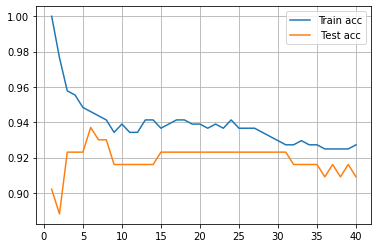

In [21]:
train_acc = []
test_acc = []

n_neighbors = range(1, 41)
for n in n_neighbors:
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X_train, y_train)
  train_acc.append(model.score(X_train, y_train))
  test_acc.append(model.score(X_test, y_test))


plt.plot(n_neighbors, train_acc, label = 'Train acc')
plt.plot(n_neighbors, test_acc, label = ' Test acc')
plt.legend()
plt.grid()
plt.show()

과대적합과 과소적합의 특징을 발견 (이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태가 나타남) <br>
이웃의 수가 하나일 때 훈련 데이터에 대한 예측이 완벽하나, 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어든다.

정확도가 가장 좋을 때는? -> 중간정도인 6개를 사용했을 경우

### K-NN 회귀

k-NN을 회귀에 사용한 경우
- 여러 개의 최근접 이웃을 사용할 경우에는 이웃 간의 평균이 예측 <br> (분류에서는 이웃의 레이블 개수를 확인해서 다수결로 정했지만, 회귀에서는 이웃들의 평균을 계산한다는 점이 차이)

- 분류는 모델과 비교하여 유사한 데이터의 개수(불연속)로 판단한다면 회귀는 데이터의 평균유사도 (연속적인)와 같은 수치로 판단

Classification(분류)는 연속적이지 않은 레이블, 다시 말해 ‘무엇’인지를 예측하지만, 회귀(Regression)는 연속된 수치, 즉 ‘얼마나’를 예측

In [23]:
pip install mglearn

     |████████████████████████████████| 542kB 4.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f2e0c355e247f9fa45307aeb4abbf0a6152e9ddbad08869858fe2f279ae0ce65
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


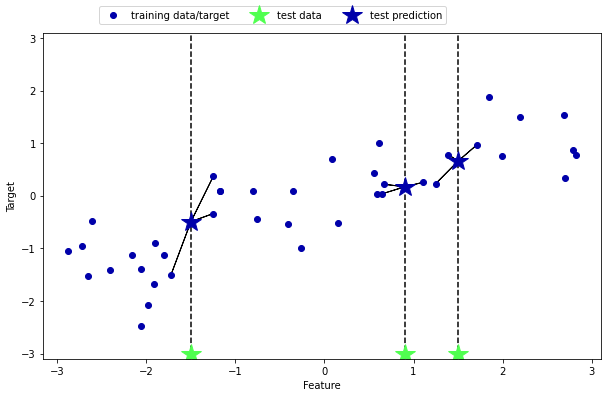

In [25]:

import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_knn_regression(n_neighbors=3) # 왜 test data가 3개밖에 없는지

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

model.predict(X_test)


array([-0.04382817, -0.04382817, -0.04382817])